# Lego Dataset Analysis 

### Objectives Of the Analysis :
__1. What percentage of all licensed sets ever released were Star Wars themed?__ 

__2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?__

### Data Description :
1. __Lego_sets.csv__

- __set_num:__ A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
- __set_name:__ A name for every set in the dataset (note that this can be the same for different sets).
- __year:__ The date the set was released.
- __num_parts:__ The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
- __theme_name:__ The name of the sub-theme of the set.
- __parent_theme:__ The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

2. __parent_theme.csv__

- __id:__ A code that is unique to every theme.
- __name:__ The name of the parent theme.
- __is_licensed:__ A Boolean column specifying whether the theme is a licensed theme.

### Importing the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the lego_sets data
df = pd.read_csv('C:/Users/hi/Downloads/Lego_Dataset_Analysis/lego_sets.csv')

In [3]:
#importing the parent_themes data
themes = pd.read_csv('C:/Users/hi/Downloads/Lego_Dataset_Analysis/parent_themes.csv')

In [4]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [5]:
themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


Since we have matching columns in both files we might as well merge them for easier Analysis

In [6]:
merged_df = df.merge(themes, left_on='parent_theme', right_on='name')

In [7]:
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False


We can see that we have duplicate columns in the merged DataFrame namely, __parent_theme__ and __name_y__. So we are going to drop one

In [8]:
merged_df.drop(columns="name_y",inplace=True)

In [9]:
merged_df.head(5)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


Before proceedinf further we will rename the __name_x__ column to __name__

In [10]:
merged_df = merged_df.rename(columns={'name_x':'name'})

In [11]:
merged_df.head(5)

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


We will now extract the licensed portion of lego sets from the DataFrame

In [12]:
licensed = merged_df[merged_df["is_licensed"]==True]

In [13]:
licensed.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


We dont really want the Data where the __set_num__ doesnt exist so we are going to clean the missing values and duplicates.

In [14]:
licensed.isnull().sum()

set_num         153
name            153
year              0
num_parts       577
theme_name      153
parent_theme      0
id                0
is_licensed       0
dtype: int64

In [15]:
licensed = licensed.dropna(subset=['set_num'])

In [16]:
licensed.isnull().sum()

set_num           0
name              0
year              0
num_parts       515
theme_name        0
parent_theme      0
id                0
is_licensed       0
dtype: int64

Now we are going to find out what percentage of the licensed dataset is Star Wars Themed.

Lets check for duplicates.

In [17]:
licensed.duplicated()

3493     False
3494     False
3495     False
3496     False
3497     False
         ...  
11981    False
11982    False
11983    False
11984    False
11985    False
Length: 1179, dtype: bool

So we can see that there are no duplicates.

In [18]:
star_wars = licensed[licensed["parent_theme"]=="Star Wars"]

In [19]:
perc_starwars = (len(star_wars)/len(licensed))*100
print(f'The percentage of licensed lego Sets that are star wars themed:\n {perc_starwars}')

The percentage of licensed lego Sets that are star wars themed:
 51.653944020356235


In [20]:
licensed["parent_theme"].value_counts()

Star Wars                           609
Super Heroes                        242
Harry Potter                         67
The Hobbit and Lord of the Rings     40
Minecraft                            30
Disney Princess                      29
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Scooby-Doo                            6
Disney's Mickey Mouse                 6
Prince of Persia                      6
Angry Birds                           6
Ben 10                                6
Avatar                                2
Disney                                1
Ghostbusters                          1
Name: parent_theme, dtype: int64

We have so many different values in the "parent_them" column. Visualizing the Data would not look so tidy.
So we can group the rest of the data in a single category called others and the other category would be Star Wars.

__Visualizing the Data__

In [21]:
licensed["parent_theme_grouped"] = licensed["parent_theme"].apply(lambda x: 'Other' if x != 'Star Wars' else x)

In [22]:
licensed.columns.tolist()

['set_num',
 'name',
 'year',
 'num_parts',
 'theme_name',
 'parent_theme',
 'id',
 'is_licensed',
 'parent_theme_grouped']

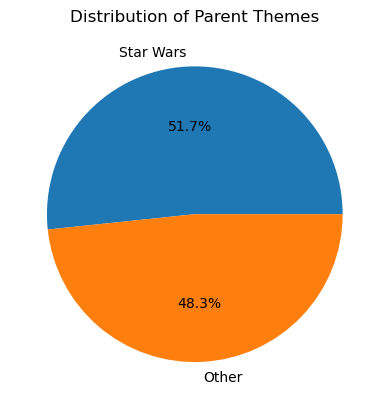

In [23]:
parent_theme_counts = licensed['parent_theme_grouped'].value_counts()

plt.pie(parent_theme_counts, labels=parent_theme_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Parent Themes')

plt.show()

Now we Filter the Data for the Star Wars Licensed sets so we can find out how many sets were released each year.

In [24]:
star_wars_licensed = licensed[licensed["parent_theme"]=="Star Wars"]

In [27]:
star_wars_licensed.head(3)

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,parent_theme_grouped
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True,Star Wars
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,Star Wars
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True,Star Wars


In [34]:
yearly_releases = star_wars_licensed.groupby('year').size().reset_index(name='Count')
print(yearly_releases)

    year  Count
0   1999     13
1   2000     26
2   2001     14
3   2002     28
4   2003     32
5   2004     20
6   2005     28
7   2006     11
8   2007     16
9   2008     23
10  2009     39
11  2010     30
12  2011     32
13  2012     43
14  2013     35
15  2014     45
16  2015     58
17  2016     61
18  2017     55


In [35]:
yearly_releases.min()

year     1999
Count      11
dtype: int64

We can clearly see that we have a tie. The popularity of Star Wars according to the sets produced were the lowest in the year __1999__ and __2006__

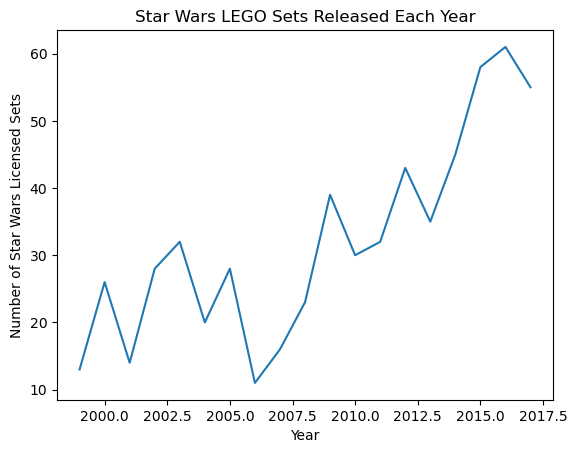

In [33]:
#Visualizing the Data
plt.plot(yearly_releases['year'], yearly_releases['Count'])
plt.xlabel('Year')
plt.ylabel('Number of Star Wars Licensed Sets')
plt.title('Star Wars LEGO Sets Released Each Year')
plt.show()

## Data analysis Results:

### Objective 1: Percentage of Star Wars Licensed Sets

**Finding:** 51.7% of all licensed LEGO sets ever released were Star Wars themed.

**Interpretation:** This significant percentage underscores the enduring popularity of the Star Wars franchise among LEGO enthusiasts. The high proportion of Star Wars sets likely reflects the franchise's global appeal and its ability to capture the imagination of fans of all ages.

### Objective 2: Years When Star Wars Was Not the Most Popular Licensed Theme

**Finding:** Star Wars was not the most popular licensed theme in 1999 and 2006.

**Interpretation:** While Star Wars has consistently been a major force in the LEGO licensed theme landscape, there were specific years where other licensed themes outperformed it. This could be attributed to various factors, such as:

* **Competition from other popular franchises:** In 1999 and 2006, other licensed themes (e.g., Harry Potter, Lord of the Rings) may have experienced surges in popularity, leading to a higher number of sets being released.
* **Strategic decisions by LEGO:** LEGO's product strategy may have influenced the number of sets released for different themes in these years. For instance, they might have focused on expanding other franchises to diversify their product line.
* **Market trends and consumer preferences:** Changes in consumer preferences or market trends could have impacted the demand for Star Wars sets in these specific years.

**Overall, the analysis suggests that while Star Wars has been a dominant force in the LEGO licensed theme space, its popularity is not always unchallenged. Other franchises can occasionally compete for the top spot, demonstrating the dynamic nature of the LEGO market.**
